In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [40]:
# 构造数据集
def synthetic_data(w, b, num_examples):
    # 生成 y = x*w + b + 噪声
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [41]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-1.5419,  1.0442]) 
label: tensor([-2.4355])


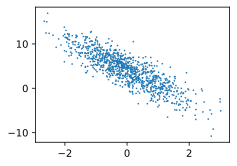

In [42]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 0.5)

In [43]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机读取样本，没有顺序
    random.shuffle(indices)    # 打乱顺序
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])  # 注意这里min（）作用是如果没有i+batch_size超出了总的数量，就取到最后
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y)
    break

tensor([[-1.4239,  0.1829],
        [ 0.9431, -1.6230],
        [ 0.2499, -0.7064],
        [-0.0476, -0.4238],
        [-0.7936, -0.9359],
        [ 1.0897, -1.3389],
        [ 1.2239, -0.3562],
        [-0.8537,  1.0737],
        [ 3.5016,  0.2023],
        [-1.3311,  1.8792]]) 
 tensor([[ 0.7267],
        [11.6061],
        [ 7.0986],
        [ 5.5420],
        [ 5.7931],
        [10.9281],
        [ 7.8468],
        [-1.1516],
        [10.5134],
        [-4.8334]])


In [44]:
# 定义初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
# b设置为初始值为0的标量
b = torch.zeros(1, requires_grad=True)

In [45]:
def linear_regression(x, w, b):
    # 线性模型
    return torch.matmul(x, w) + b

In [46]:
# 损失函数
def squared_loss(y_hat, y):
    # 均方损失
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [47]:
# 定义优化算法
def sgd(params, lr, batch_size):
    # 小批量随机梯度下降
    with torch.no_grad():   # 更新的时候不需要梯度
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()    # 每更新一次参数，都要让对应的梯度清零

In [51]:
lr = 0.01
num_epochs = 30
net = linear_regression
loss = squared_loss
optimer = sgd

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y)
        l.sum().backward()
        optimer([w, b], lr, batch_size)  # 优化
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_l.mean()):f}')

epoch1, loss 0.000052
epoch2, loss 0.000052
epoch3, loss 0.000052
epoch4, loss 0.000052
epoch5, loss 0.000052
epoch6, loss 0.000052
epoch7, loss 0.000052
epoch8, loss 0.000052
epoch9, loss 0.000052
epoch10, loss 0.000052
epoch11, loss 0.000052
epoch12, loss 0.000052
epoch13, loss 0.000052
epoch14, loss 0.000052
epoch15, loss 0.000052
epoch16, loss 0.000052
epoch17, loss 0.000052
epoch18, loss 0.000052
epoch19, loss 0.000052
epoch20, loss 0.000052
epoch21, loss 0.000052
epoch22, loss 0.000052
epoch23, loss 0.000052
epoch24, loss 0.000052
epoch25, loss 0.000052
epoch26, loss 0.000052
epoch27, loss 0.000052
epoch28, loss 0.000052
epoch29, loss 0.000052
epoch30, loss 0.000052


In [49]:
# 评估
print(f"w的估计误差: {true_w - w.reshape(true_w.shape)}")
print(f"b的估计误差: {true_b - b}")

w的估计误差: tensor([ 4.4465e-04, -2.0742e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0004], grad_fn=<RsubBackward1>)
